# Edge Detection on Road Lanes

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
img_path = '../img/lanes/lane.jpg'

In [4]:
# Read in the image and convert it to grayscale
image = mpimg.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define a kernel size for Gaussian smoothing
kernel_size = 5  # Must be an odd number
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Define parameters for Canny edge detection
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

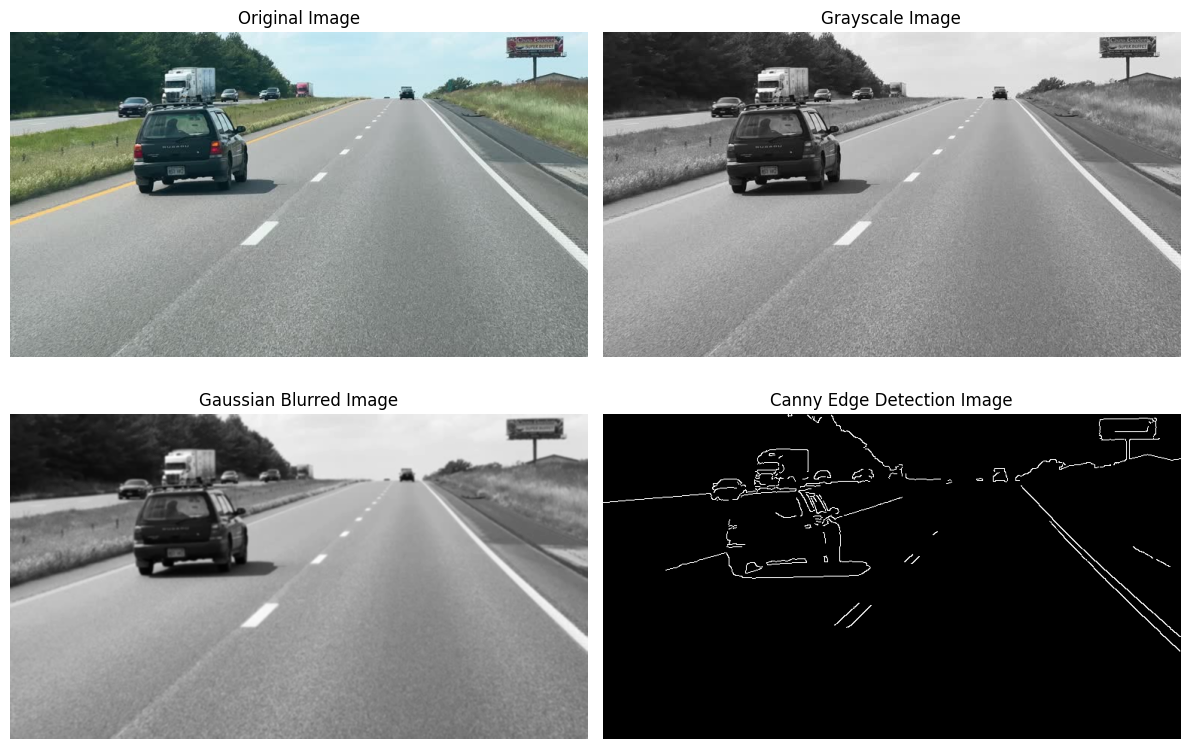

In [5]:
# Display the original image
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')  # Hide axes

# Display the blurred image
plt.subplot(2, 2, 3)
plt.imshow(blur_gray, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')  # Hide axes

# Display the edges detected
plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.axis('off')  # Hide axes

# Show all images in a neat layout
plt.tight_layout()
plt.show()

#  Hough Transform and detecting Lane Lines  

In [38]:
# Read in and grayscale the image
image = mpimg.imread(img_path)
img = cv2.imread(img_path)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [39]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [40]:
# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

(np.float64(-0.5), np.float64(767.5), np.float64(431.5), np.float64(-0.5))

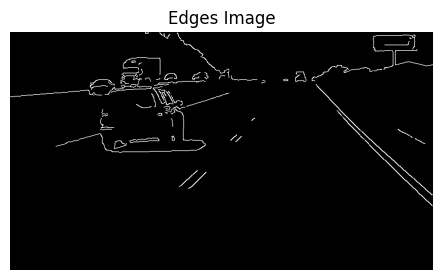

In [41]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(edges, cmap='Greys_r')
plt.title("Edges Image")
plt.axis('off')

In [42]:
edges.shape

(432, 768)

In [65]:
h, w = edges.shape
shift = 50
roi = [(shift, shift), (shift, h - shift), (w - shift, h - shift), (w - shift, shift)]

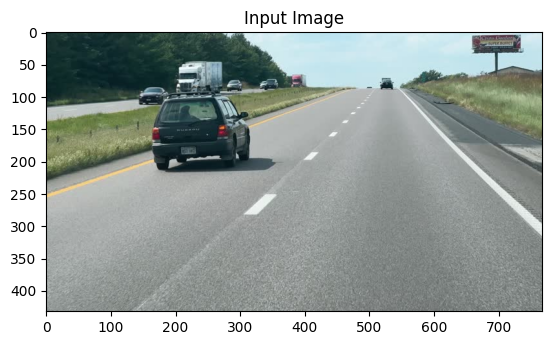

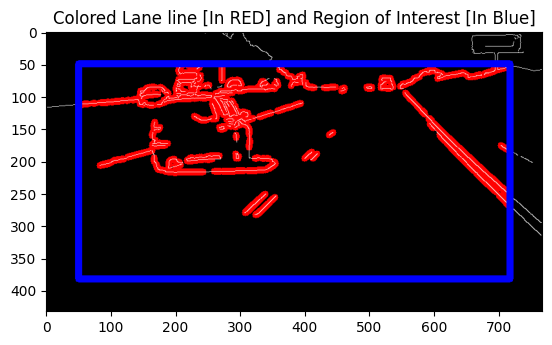

In [66]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
vertices = np.array([roi], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()